# Audio
source: https://realpython.com/playing-and-recording-sound-python/

## Contents
0. Install the libraries
1. Playsound
2. Simpleaudio
3. Resampy
4. SciPy Wavfile

To do:
 - pysoundfile: https://pysoundfile.readthedocs.io/en/latest/
 - YAMNet: https://github.com/tensorflow/models/tree/master/research/audioset/yamnet
 - ffmpeg for converting files

## 1. Playsound
Simple library to play sounds

In [2]:
pip install playsound

In [ ]:
#Play an audiofile with one line of code! Can't stop the music. 
from playsound import playsound

playsound('razorback.mp3')

## 2. Simpleaudio - only for wav files


In [5]:
pip install simpleaudio

Note: you may need to restart the kernel to use updated packages.


In [36]:
import simpleaudio as sa

filename = 'out.wav' #mijn hallo 
wave_obj = sa.WaveObject.from_wave_file(filename)
play_obj = wave_obj.play()
play_obj.wait_done()  # Wait until sound has finished playing

In [7]:
# turn a numpy array into a tone
import numpy as np
import simpleaudio as sa

frequency = 440  # Our played note will be 440 Hz
fs = 44100  # 44100 samples per second
seconds = 3  # Note duration of 3 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)

# Generate a 440 Hz sine wave
note = np.sin(frequency * t * 2 * np.pi)

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
# Convert to 16-bit data
audio = audio.astype(np.int16)

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, fs)

# Wait for playback to finish before exiting
play_obj.wait_done()

## 3. Resampy

In [14]:
%pip install #only used for demonstration perposes
%pip install resampy

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#only'


In [13]:
import librosa
import resampy

# Load in librosa's example audio file at its native sampling rate
x, sr_orig = librosa.load(librosa.util.example_audio_file(), sr=None)

# x is now a 1-d numpy array, with `sr_orig` audio samples per second

# We can resample this to any sampling rate we like, say 16000 Hz
y_low = resampy.resample(x, sr_orig, 16000)

# That's it!

In [15]:
type(x)

numpy.ndarray

In [16]:
type(y_low)

numpy.ndarray

In [17]:
x

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [18]:
y_low

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## 4. Scipy wavfile

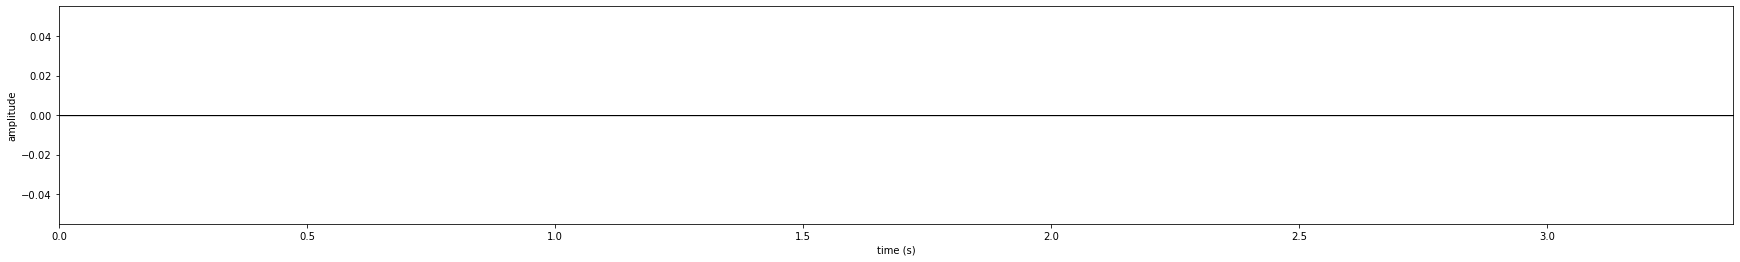

In [24]:
#source:https://gist.github.com/leouieda/9043213 #NOT WORKING
# Load the required libraries:
#   * scipy
#   * numpy
#   * matplotlib
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('out.wav')
times = np.arange(len(data))/float(samplerate)

# Make the plot
# You can tweak the figsize (width, height) in inches
plt.figure(figsize=(30, 4))
plt.fill_between(times, data[0], color='k') # data[:,1],
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot.png', dpi=100)
plt.show()

In [ ]:
#source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

In [30]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io

In [42]:
data_dir = pjoin(dirname(scipy.io.__file__), 'tests', 'data')
wav_fname =  pjoin(data_dir, 'test-44100Hz-2ch-32bit-float-be.wav')#works partly with 'out.wav'

In [43]:
samplerate, data = wavfile.read(wav_fname)
print(f"number of channels = {data.shape[1]}")

number of channels = 2


In [44]:
length = data.shape[0] / samplerate
print(f"length = {length}s")

length = 0.01s


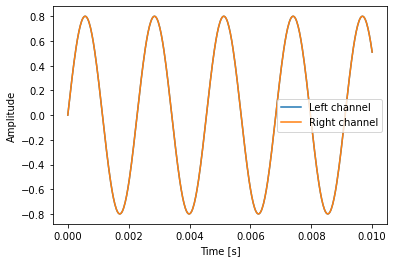

In [45]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()